In [95]:
import pandas as pd
import glob
import os
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [96]:
generos = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'ScienceFiction', 'TVMovie', 'Thriller', 'War', 'Western']

def read_parquet(pasta):
    arquivos_parquet = glob.glob(os.path.join(pasta, '*.parquet'))
    lista_df = [pd.read_parquet(arquivo) for arquivo in arquivos_parquet]
    df = pd.concat(lista_df, ignore_index=True)
    return df

In [97]:
df_parquet = read_parquet('./preprocess/movies')[generos]
label = 'Action'
features = generos.copy()
features.remove(label)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(df_parquet[features], df_parquet[label], test_size=0.3, random_state=42, stratify=df_parquet[label])

In [109]:
# Reduzindo para 2 componentes principais para visualização
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_train)


In [110]:
print("Antes do Undersampling: {}".format(len(X_train)))

rus = RandomUnderSampler(random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)

print("Depois do Undersampling: {}".format(len(X_train)))

Antes do Undersampling: 26976
Depois do Undersampling: 8392


In [33]:

# Obter os autovalores
autovalores = pca.explained_variance_

# Obter os componentes principais (autovetores)
componentes_principais = pca.components_

# Imprimir os autovalores
print("Autovalores:", autovalores)

# Imprimir os componentes principais
print("Componentes Principais (autovetores):", componentes_principais)

Autovalores: [0.2920196  0.25013851 0.1584998  0.11608382 0.1035732  0.09681893
 0.07122806 0.06045437 0.05503    0.04911483 0.04580768 0.04124649
 0.03663709 0.03396515 0.03232148 0.02992513 0.02342018 0.02200467
 0.01679202]
Componentes Principais (autovetores): [[-5.46234971e-02 -6.62042316e-02 -4.48236891e-01  9.94491477e-02
  -1.09970340e-01  8.49079615e-01 -6.91067211e-02 -4.85833715e-02
   2.15432053e-02  4.42492741e-02 -9.47779895e-02 -1.45077967e-02
   3.61044373e-02  1.01943890e-01 -6.30171890e-02  3.86299605e-03
   1.13278629e-01  3.74537971e-02 -1.13409279e-02]
 [-4.16931259e-02 -1.11837511e-02  6.37885626e-01 -1.17011901e-01
  -1.15438501e-01  3.19282609e-01  4.08373308e-02 -6.97560181e-03
   7.68007463e-03  2.68489301e-03 -2.76887146e-01  2.92267858e-02
  -1.23444087e-01  3.70721220e-01 -1.04075687e-01 -1.44595135e-04
  -4.68376385e-01  5.41744317e-03 -8.11547427e-03]
 [-9.10356991e-02 -8.10710334e-02  4.74745844e-01  3.08431703e-01
  -3.69274449e-01  5.64165422e-02 -8.88

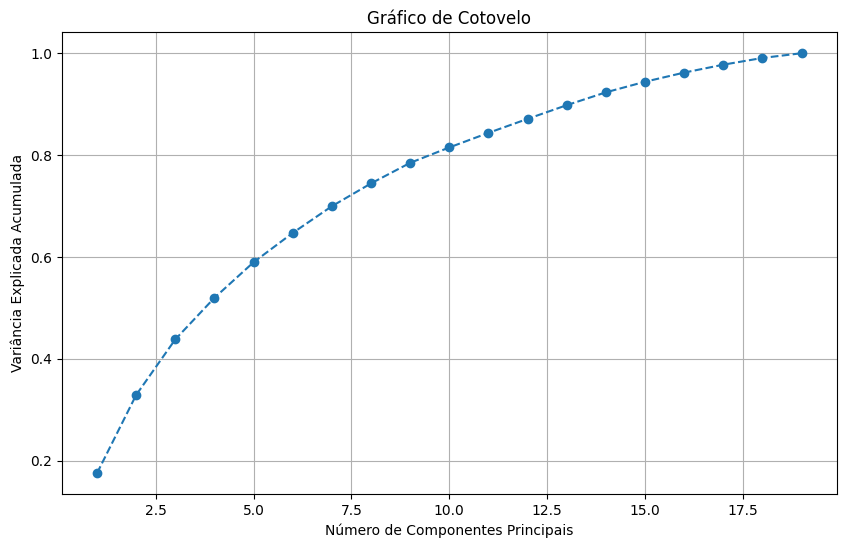

In [49]:
# Variância explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Plotar a variância explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Gráfico de Cotovelo')
plt.grid(True)
plt.show()

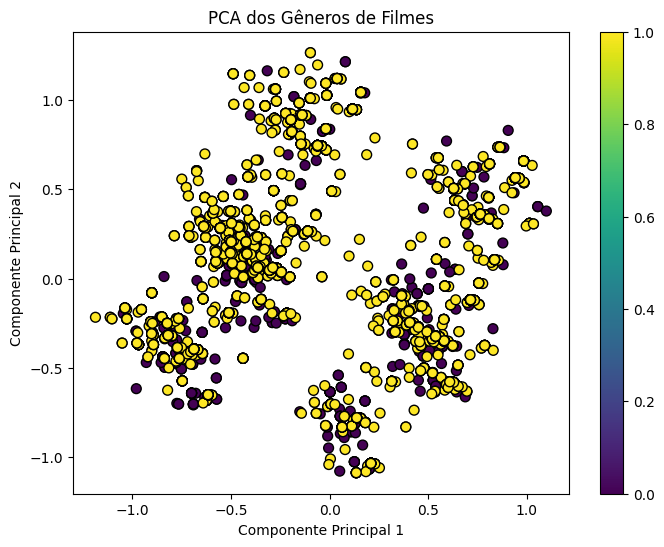

In [90]:
# Plotar os componentes principais
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA dos Gêneros de Filmes')
plt.colorbar()
plt.show()

/tmp/ipykernel_13921/422869109.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


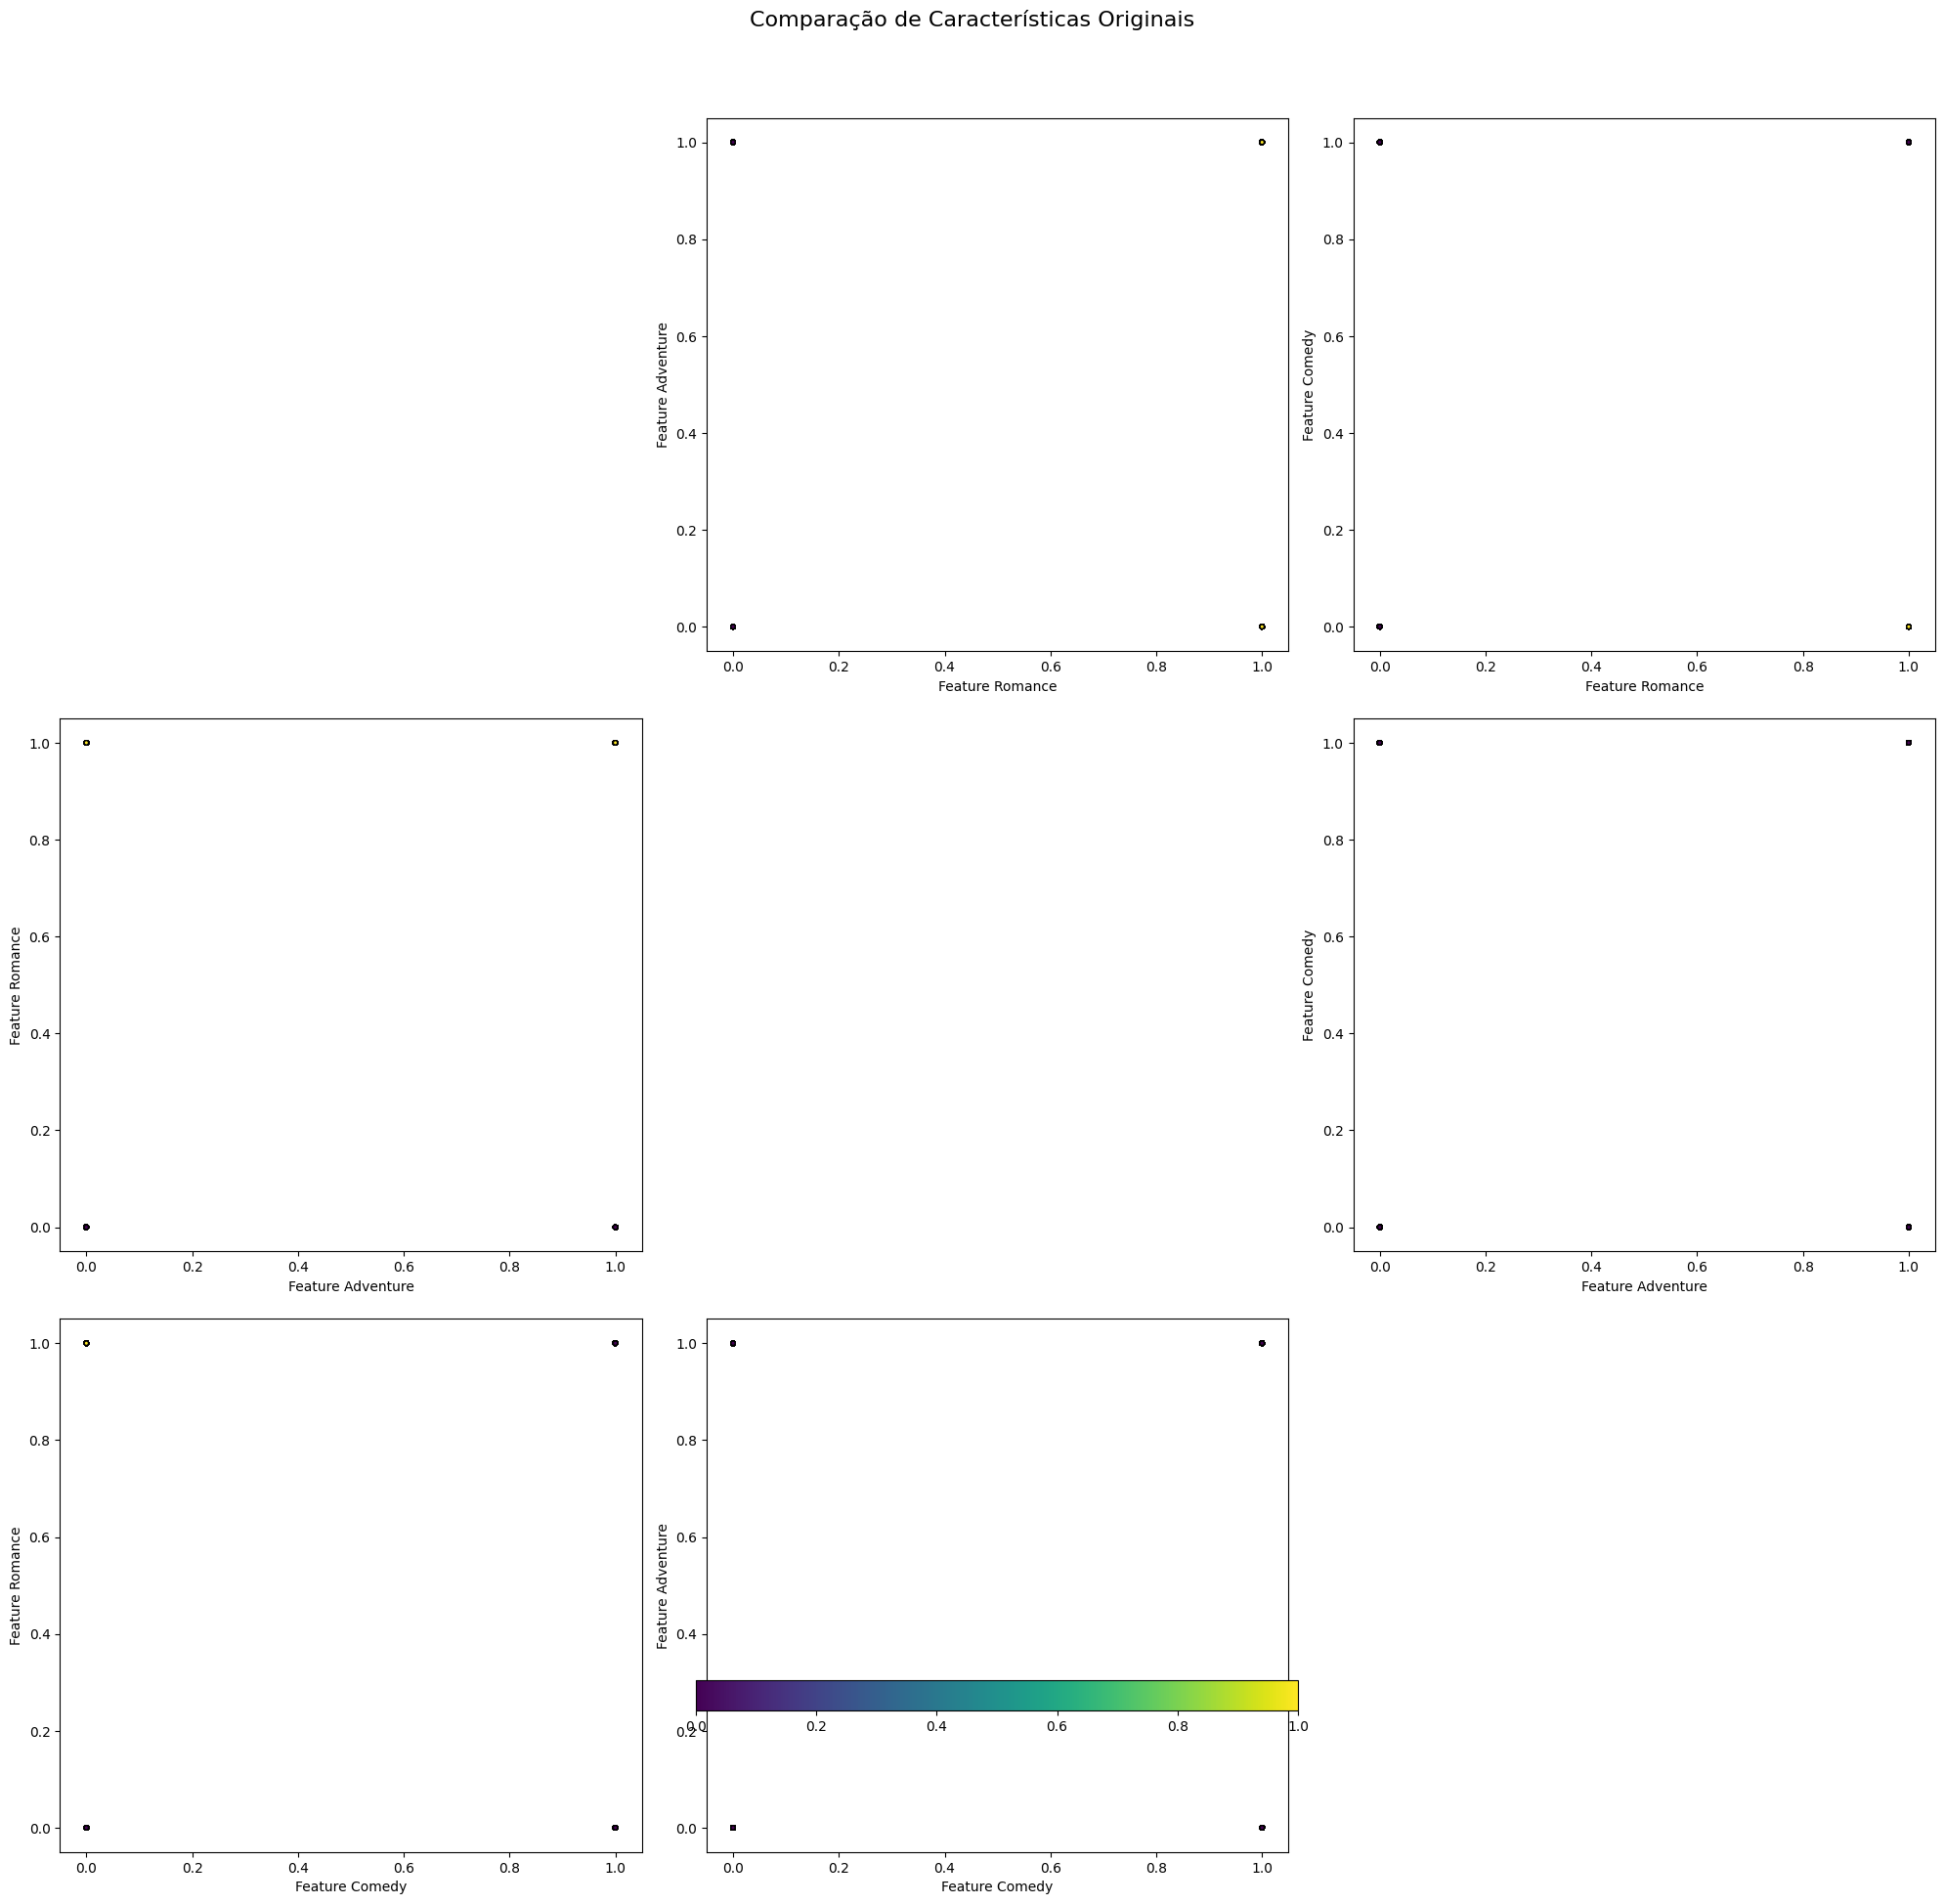

In [92]:
selected_columns = ['Romance', 'Adventure', 'Comedy']
X_train_selected = X_train[selected_columns]
num_features = X_train_selected.shape[1]
# Criar uma figura com subplots
fig, axes = plt.subplots(num_features, num_features, figsize=(20, 20))
fig.suptitle('Comparação de Características Originais', fontsize=16)

# Iterar sobre todas as combinações de características
for i in range(num_features):
    for j in range(num_features):
        if i != j:
            ax = axes[i, j]
            sc = ax.scatter(X_train.iloc[:, i], X_train.iloc[:, j], c=y_train, cmap='viridis', edgecolor='k', s=10)
            ax.set_xlabel(f'Feature {selected_columns[i]}')
            ax.set_ylabel(f'Feature {selected_columns[j]}')
        else:
            axes[i, j].axis('off')

# Adicionar uma barra de cores
fig.colorbar(sc, ax=axes, orientation='horizontal', fraction=0.02, pad=0.1)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


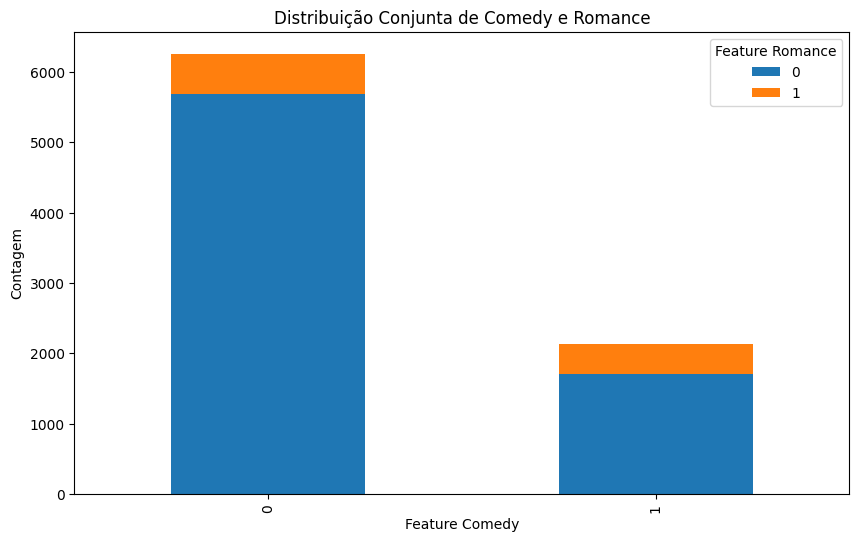

In [72]:
df = X_train[['Comedy', 'Romance']]

# Contar as combinações de valores binários
counts = df.groupby(['Comedy', 'Romance']).size().unstack(fill_value=0)

# Plotar o gráfico de barras empilhadas
counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Feature Comedy')
plt.ylabel('Contagem')
plt.title('Distribuição Conjunta de Comedy e Romance')
plt.legend(title='Feature Romance')
plt.show()

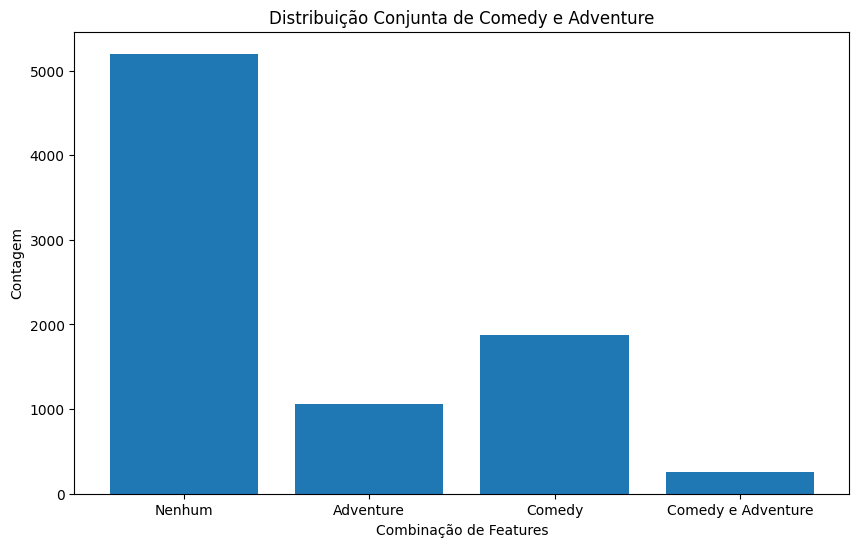

In [83]:
df = X_train[['Comedy', 'Adventure']]

# Contar as combinações de valores binários
counts = df.groupby(['Comedy', 'Adventure']).size().reset_index(name='Count')

# Criar uma nova coluna para as combinações
combination_mapping = {
    '00': 'Nenhum',
    '01': 'Adventure',
    '10': 'Comedy',
    '11': 'Comedy e Adventure'
}
counts['Combination'] = counts['Comedy'].astype(str) + counts['Adventure'].astype(str)
counts['Combination'] = counts['Combination'].map(combination_mapping)

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(counts['Combination'], counts['Count'])
plt.xlabel('Combinação de Features')
plt.ylabel('Contagem')
plt.title('Distribuição Conjunta de Comedy e Adventure')
plt.show()


In [84]:
df = X_train[['Romance', 'Adventure', 'Comedy']]

# Contar as combinações de valores binários
counts = df.groupby(['Romance', 'Adventure', 'Comedy']).size().reset_index(name='Count')

# Imprimir as intersecções
print(counts)


   Romance  Adventure  Comedy  Count
0        0          0       0   4692
1        0          0       1   1478
2        0          1       0    989
3        0          1       1    233
4        1          0       0    507
5        1          0       1    403
6        1          1       0     68
7        1          1       1     22


In [111]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)
y_pred = np.where(y_pred < 0.5, 0, 1)

# Avaliando o modelo
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.77      0.85      9764
           1       0.38      0.76      0.51      1798

    accuracy                           0.77     11562
   macro avg       0.66      0.77      0.68     11562
weighted avg       0.86      0.77      0.80     11562



In [112]:
# Calculando o número de acertos e erros
acertos = (y_test == y_pred).sum()
erros = (y_test != y_pred).sum()

# Imprimindo os resultados
print(f"Número de instâncias que a predição acertou: {acertos}")
print(f"Número de instâncias que a predição errou: {erros}")

# Alternativamente, você pode usar a acurácia para verificar
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")

Número de instâncias que a predição acertou: 8926
Número de instâncias que a predição errou: 2636
Acurácia: 0.77


In [118]:
predictions_df = pd.DataFrame({
    'predicted_rating': y_test,
    'Y_user': y_pred
})

# Gerando o ranking dos filmes com base nas previsões
random_sample = predictions_df.sample(n=50, random_state=42)
print(random_sample.head(50))

       predicted_rating  Y_user
6389                  1       1
18063                 0       0
1337                  1       0
21975                 0       0
10316                 0       0
21477                 1       1
22191                 1       0
35021                 0       0
15770                 0       0
35196                 0       1
9829                  1       1
15648                 0       0
32679                 0       0
25779                 1       1
20682                 1       1
24248                 0       0
4928                  1       1
7967                  0       0
23181                 0       0
15661                 0       0
25045                 0       0
25931                 1       1
9753                  1       1
25330                 1       1
23325                 1       0
27236                 0       0
576                   1       1
10738                 0       1
10119                 1       1
20997                 0       1
3277    